In [17]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
max_iteration = 20000
markers = [i * 10 for i in range(0,100+1)]
markers[-1] = markers[-1]-1
import pandas as pd

test_types= ["psiRemoved"]
max_trial = 5
results = []
#df = pd.DataFrame(columns=['Trial','Iteration','Average Trajectory Reward','Cumulative Step','Randomised State','Penalty Tanh Wrapper','Clipping'], dtype=float)
def load(df,run,randomised_state,tanh,Clipping):
    if run == "runs/":
        fill = ""
    else:
        fill = "trial_"
    for trial in range(1,max_trial+1):
        trial_data = [[]]*2
        for th in tanh:
            for marker in markers:
                data = np.load(run+str(trial)+"_marker_"+str(marker)+"_results_"+fill+str(trial)+"_with_psi_restriction_True_randomised_state_"+str(randomised_state)+"_goal_False_test_psiRemoved_tanh_"+str(th)+".npy")
                size =  np.shape(data)[1]
                trial_data = np.concatenate([trial_data, data],axis=1)
            trial_number = [[trial]]*1001
            trial_iteration = [[i] for i in range(1001)]
            reward , timestep = trial_data
            reward = np.reshape(reward,(1001,1))
            timestep = np.reshape(timestep,(1001,1))
            trial_tanh = [[int(th)]]*1001
            #print(trial_tanh)
            trial_rs = [[int(randomised_state)]]*1001
            trial_clipping = [[int(Clipping)]]*1001
            trial_data = np.concatenate([trial_number, trial_iteration,reward, timestep,trial_rs,trial_tanh,trial_clipping], axis=1)
            trial_data = np.reshape(trial_data, (1001,7))
            temp = pd.DataFrame(trial_data,columns=['Trial','Iteration','Average Trajectory Reward','Cumulative Step','Randomised State','Penalty Tanh Wrapper','Clipping'], dtype=float)
            df = df.append(temp,ignore_index=True)
    return df

df = pd.read_csv("Bike_experiment_results.csv")
df.drop(columns= df.columns[0],axis=1,inplace=True)




In [18]:
#df1 = load(df,"runs5/trial_",True,[True],True)
#df1 = load(df1,"runs4/trial_",True,[False],True)
#df1 = load(df1,"runs2/trial_",False,[False],True)
#df1 = load(df1,"runs3/trial_",False,[True],True)
#df = pd.DataFrame(columns=['Trial','Iteration','Average Trajectory Reward','Cumulative Step','Randomised State','Penalty Tanh Wrapper','Clipping'])
df1 = load(df, "withoutClipping/trial_",False,[False],False)
df1 = load(df1, "withoutClipping/trial_",False,[True],False)
df1 = load(df1, "withoutClipping/trial_",True,[False],False)
df1 = load(df1, "withoutClipping/trial_",True,[True],False)

df1['Penalty Tanh Wrapper'] = df1['Penalty Tanh Wrapper'].astype(bool)
randomised_state_withoutclipping = df1.loc[(df1['Clipping'] == 0.) & (df1["Randomised State"] == 1.)]
randomised_state_withclipping = df1.loc[(df1['Clipping'] == 1.) & (df1["Randomised State"] == 1.)]
static_state_withoutclipping = df1.loc[(df1['Clipping'] == 0.) & (df1["Randomised State"] == 0.)]
static_state_withclipping = df1.loc[(df1['Clipping'] == 1.) & (df1["Randomised State"] == 0.)]

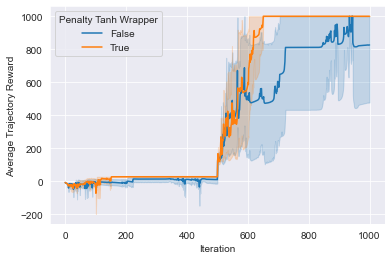

In [19]:

a = seaborn.lineplot(randomised_state_withoutclipping, x= "Iteration", y="Cumulative Step",  hue = "Penalty Tanh Wrapper")
plt.savefig("randomised_state_withoutclipping_steps.pdf")
plt.clf()
b = seaborn.lineplot(randomised_state_withoutclipping, x= "Iteration", y="Average Trajectory Reward",  hue = "Penalty Tanh Wrapper")
plt.savefig("randomised_state_withoutclipping_Reward.pdf")
plt.clf()
c = seaborn.lineplot(randomised_state_withclipping, x= "Iteration", y="Cumulative Step",  hue = "Penalty Tanh Wrapper")
plt.savefig("randomised_state_withclipping_steps.pdf")
plt.clf()
d = seaborn.lineplot(randomised_state_withclipping, x= "Iteration", y="Average Trajectory Reward",  hue = "Penalty Tanh Wrapper")
plt.savefig("randomised_state_withclipping_Reward.pdf")
plt.clf()
e = seaborn.lineplot(static_state_withoutclipping, x= "Iteration", y="Cumulative Step",  hue = "Penalty Tanh Wrapper")
plt.savefig("static_state_withoutclipping_steps.pdf")
plt.clf()
f = seaborn.lineplot(static_state_withoutclipping, x= "Iteration", y="Average Trajectory Reward",  hue = "Penalty Tanh Wrapper")
plt.savefig("static_state_withoutclipping_Reward.pdf")
plt.clf()
g = seaborn.lineplot(static_state_withclipping, x= "Iteration", y="Cumulative Step",  hue = "Penalty Tanh Wrapper")
plt.savefig("static_state_withclipping_steps.pdf")
plt.clf()
h = seaborn.lineplot(static_state_withclipping, x= "Iteration", y="Average Trajectory Reward",  hue = "Penalty Tanh Wrapper")
plt.savefig("static_state_withclipping_Reward.pdf")



In [14]:
import numpy as np
a = np.load("runs/trial_1_marker_110_results_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy")

In [15]:
print(a[-1])

[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
